<a href="https://colab.research.google.com/github/chenirene00/Linear_Regression_Project/blob/master/Seoul_Bike_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Bike count

## Step 1 - Import Required Libraries 

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data 

In [260]:
data = pd.read_csv('/content/SeoulBikeData.csv')

In [261]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [262]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [264]:
data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [265]:
data.shape

(8760, 14)

In [266]:
data.isna().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [267]:
data = data.drop(columns=['Date'])

In [268]:
data = pd.get_dummies(data)

In [269]:
data.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes'],
      dtype='object')

In [270]:
data.shape

(8760, 18)

In [271]:
data = data.drop(columns=['Seasons_Spring','Holiday_No Holiday','Functioning Day_No'])

In [272]:
data.shape

(8760, 15)

In [273]:
data.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,0,1


In [274]:
data.shape

(8760, 15)

In [275]:
data.corr()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Functioning Day_Yes
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,1.027530e-01,2.965494e-01,-4.249251e-01,-7.233757e-02,0.203943
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,1.991407e-15,8.578102e-16,-1.697335e-15,-1.391486e-16,0.005439
Temperature(C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,5.972825e-02,6.658462e-01,-7.387196e-01,-5.593084e-02,-0.050170
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,2.836650e-02,1.925949e-01,-2.382952e-01,-5.027765e-02,-0.020800
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-1.280093e-01,-6.469790e-02,1.091865e-01,2.301677e-02,0.005037
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,1.174133e-01,6.195792e-02,8.616224e-03,3.177281e-02,-0.026000
Dew point temperature(C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,6.287829e-02,6.523778e-01,-7.223664e-01,-6.675910e-02,-0.052837
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.137428e-02,1.284017e-01,-1.784202e-01,-5.077255e-03,-0.007665
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-1.324655e-02,5.392817e-02,-5.875456e-02,-1.426911e-02,0.002055
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-2.474218e-02,-9.978516e-02,2.258745e-01,-1.259072e-02,0.032089


<AxesSubplot:>

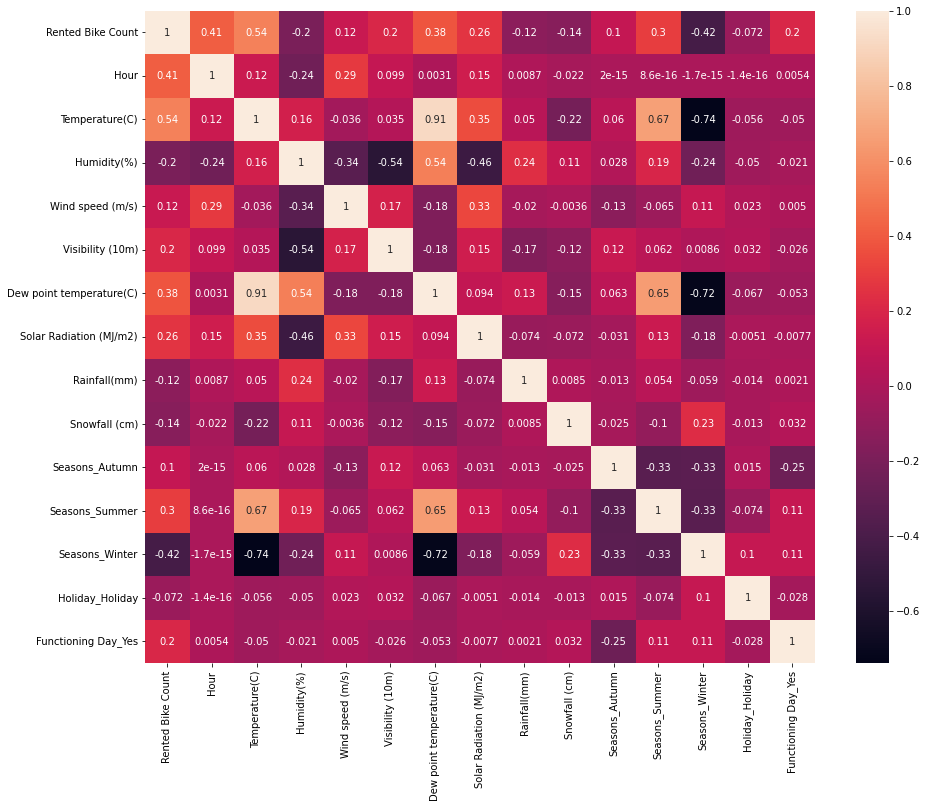

In [276]:
plt.figure(figsize=(15,12))
corr = data.corr()
sns.heatmap(corr,annot=True)

In [296]:
corr = abs(corr)
corr[corr['Rented Bike Count']<0.10]['Rented Bike Count']

Holiday_Holiday    0.072338
Name: Rented Bike Count, dtype: float64

In [278]:
data.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Seasons_Autumn', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday',
       'Functioning Day_Yes'],
      dtype='object')

In [280]:
new_data = data.drop(['Holiday_Holiday'],axis=1)

In [281]:
new_data.shape

(8760, 14)

In [282]:
new_data.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Summer,Seasons_Winter,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,1


In [283]:
X = new_data.drop(['Rented Bike Count'],axis=1)

In [284]:
X

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Summer,Seasons_Winter,Functioning Day_Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,0,0,1
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,0,0,1
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,0,0,1
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,0,0,1


In [285]:
y=new_data['Rented Bike Count']

In [286]:
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

In [287]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y, test_size=0.2)
train_x.shape

(7008, 13)

In [288]:
test_x.shape

(1752, 13)

In [289]:
train_y.shape

(7008,)

In [290]:
test_y.shape

(1752,)

In [291]:
from sklearn.linear_model import LinearRegression

In [292]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [293]:
pred = model.predict(test_x)
pred

array([ 252.11754092,  904.29900095, 1252.5782214 , ..., 1406.24004849,
        924.5976075 , 1216.9567855 ])

In [294]:
model.score(test_x,test_y)

0.5569301223418011